## K-means
http://nbviewer.jupyter.org/github/flothesof/posts/blob/master/20150717_Kmeans.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# vstack(): Stack arrays in sequence vertically (row wise).
# Take a sequence of arrays and stack them vertically to make a single array. 
points = np.vstack([np.random.randn(150, 2) * 0.75 + np.array([1, 0]),
                    np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5]),
                    np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5])])
print(points)

[[ 0.68668064  0.30249261]
 [ 0.33279561 -0.00411717]
 [-2.05333148 -0.73780051]
 [ 0.8024922  -0.76777565]
 [ 1.63304869 -0.56290145]
 [-0.3032845   0.2578121 ]
 [-0.17964164  0.95270787]
 [ 1.14497193 -1.36213585]
 [ 2.54912386 -0.07366655]
 [ 1.29931616 -0.04116315]
 [ 1.63643574 -0.1385819 ]
 [ 1.28542757 -0.7846605 ]
 [ 1.63402226 -0.44620018]
 [ 1.51457241 -0.26898851]
 [-0.75398418 -0.5158963 ]
 [-0.65917528 -0.05407945]
 [ 0.97877888  0.20956472]
 [ 0.63722565  0.02663881]
 [-0.16851281  1.31890528]
 [ 0.9995848  -0.16567381]
 [ 1.94797967 -0.21360711]
 [ 1.09809493 -1.0627955 ]
 [-0.17274623  0.41838427]
 [ 0.78830844 -0.79504429]
 [ 0.91994802 -0.13307234]
 [ 0.25314367  0.04313854]
 [ 1.38880198 -0.46325575]
 [ 0.5006189   1.37920428]
 [ 1.82401792  1.42139575]
 [ 1.67395367  0.8182264 ]
 [ 2.03659121  0.21190344]
 [ 0.17879128  0.16981986]
 [-0.51992996 -0.39547574]
 [ 1.06929222 -1.02257787]
 [ 2.0094261  -0.38412714]
 [ 0.87250787  0.21557593]
 [ 1.00034727  1.51959951]
 

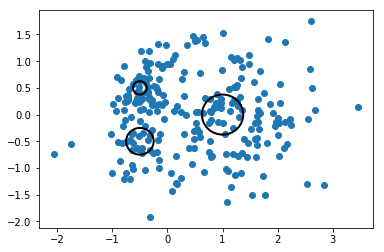

In [3]:
# Plot random generated data
# scatter(x, y)
plt.scatter(points[:, 0], points[:, 1])

# plot hidden centers
ax = plt.gca() # The function gca() returns the current axes.
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=2))

In [4]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [5]:
# Try it out
initialize_centroids(points, 3)

array([[-0.06150105, -0.07372352],
       [-0.49613769,  0.24792914],
       [ 0.77916298,  0.29232856]])

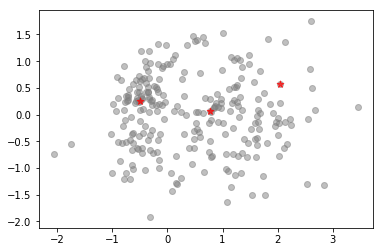

In [6]:
plt.scatter(points[:, 0], points[:, 1], c='grey', alpha=0.5)
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50, marker='*', alpha=0.7)

# https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

In [7]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2)) # broadcast
    return np.argmin(distances, axis=0) # Returns the indices of the minimum values along an axis.

In [8]:
# broadcast
print(points.shape)
print(centroids[:, np.newaxis].shape)
print((points - centroids[:, np.newaxis]).shape)
print(points - centroids[:, np.newaxis])

(250, 2)
(3, 1, 2)
(3, 250, 2)
[[[ 1.18281832  0.05456347]
  [ 0.82893329 -0.25204632]
  [-1.5571938  -0.98572965]
  ..., 
  [ 0.98532133 -0.55036073]
  [-0.35671012 -1.1159397 ]
  [ 0.34989402 -1.24974623]]

 [[-0.08087638  0.23066739]
  [-0.43476141 -0.0759424 ]
  [-2.8208885  -0.80962573]
  ..., 
  [-0.27837337 -0.37425681]
  [-1.62040482 -0.93983578]
  [-0.91380068 -1.07364231]]

 [[-1.34665506 -0.26210302]
  [-1.70054009 -0.5687128 ]
  [-4.08666718 -1.30239613]
  ..., 
  [-1.54415205 -0.86702722]
  [-2.88618351 -1.43260619]
  [-2.17957937 -1.56641272]]]


In [9]:
# Try
c = initialize_centroids(points, 3)
cc = closest_centroid(points, c)
print(c)
print(cc)

[[-0.90226761 -0.50659087]
 [-1.01928352 -0.3710031 ]
 [-0.76971816 -0.10907693]]
[2 2 1 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 2 2 2 2 0 0 2 0 2 2 0 2 2 0 2
 2 0 2 2 0 1 0 2 0 0 2 2 1 2 0 0 0 2 0 2 0 0 0 0 2 2 0 0]


In [10]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [11]:
new_centroids = move_centroids(points, closest_centroid(points, centroids), centroids)
print(new_centroids)

[[-0.47752684  0.09628393]
 [ 0.87054849 -0.19267589]
 [ 1.92046833  0.25701916]]


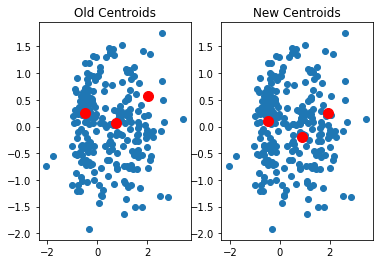

In [12]:
ax = plt.subplot(121)
ax.set_title("Old Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

ax = plt.subplot(122)
ax.set_title("New Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='r', s=100)

### Iteration

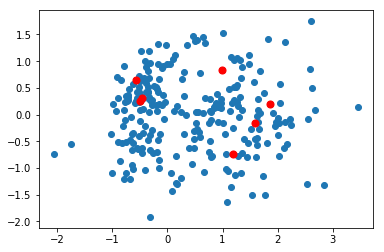

In [13]:
# init
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

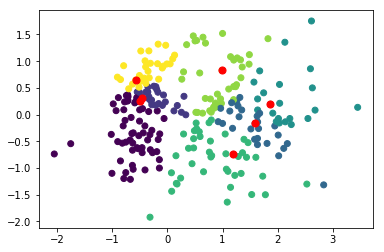

In [14]:
closest = closest_centroid(points, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

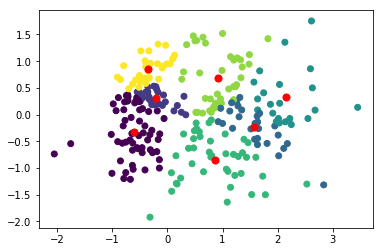

In [15]:
# run this block multiple times to get 'better' centroids

centroids = move_centroids(points, closest, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

### Animation

In [16]:
import ipywidgets

In [17]:
# init
centroids = initialize_centroids(points, 7)
print(centroids)

[[ 3.45159362  0.13561272]
 [ 1.20073534  0.27965054]
 [ 1.43462124 -0.79993944]
 [-0.31049045 -0.65836737]
 [ 1.91148835  0.0265509 ]
 [ 0.9995848  -0.16567381]
 [ 1.48633774  1.12233863]]


In [18]:
# iter
def f(x):
    global points, centroids, closest
    
    if x == 0: # print init points and random-selected starting points
        plt.scatter(points[:, 0], points[:, 1])
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("print init points and random-selected starting points")
    elif x % 3 == 1: # color the points by the closest centroids
        closest = closest_centroid(points, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("color the points by the closest centroids")
    elif x % 3 == 2: # show the color points only
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.show()
        print("show the color points only")
    else: # find the new centroids
        centroids = move_centroids(points, closest, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("find the new centroids")

In [19]:
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

ipywidgets.interact(f, x = ipywidgets.FloatSlider(min = 0.0, max = 50.0, step = 1.0, value = 0.0))

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.f>